# **PHASE 2: FEATURE ENGINEERING (30 minutes)**

### **Requirements:**

Create 5 new features based on banking domain knowledge:

**2.1 Payment Trend Feature**
- Calculate: Most recent payment status MINUS oldest payment status
- Name: `payment_trend`
- Purpose: Did payment behavior get worse (positive) or better (negative)?
- Use columns: PAY_0 and PAY_6

**2.2 Bill Amount Volatility Feature**
- Calculate: Standard deviation across all 6 monthly bill amounts
- Name: `bill_volatility`
- Purpose: How unstable is their spending?
- Use columns: BILL_AMT1 through BILL_AMT6

**2.3 Payment Ratio Feature**
- Calculate: Most recent payment amount divided by most recent bill amount
- Name: `payment_ratio`
- Purpose: Are they paying off their bills?
- Use columns: PAY_AMT1 and BILL_AMT1
- Handle division by zero (add 1 to denominator)

**2.4 Credit Utilization Feature**
- Calculate: Most recent bill amount divided by credit limit
- Name: `utilization`
- Purpose: How much of credit limit are they using?
- Use columns: BILL_AMT1 and LIMIT_BAL

**2.5 Number of Delays Feature**
- Calculate: Count how many months had payment delays (value > 0)
- Name: `num_delays`
- Purpose: Pattern of consistent delays
- Use columns: PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

**Verification:**
- Display first 10 rows of new features
- Check for any infinite values
- Check for any NaN values created
- Show min and max values of each new feature

**Deliverable:** Brief explanation of why each feature might predict default

---

(30000, 24)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                     

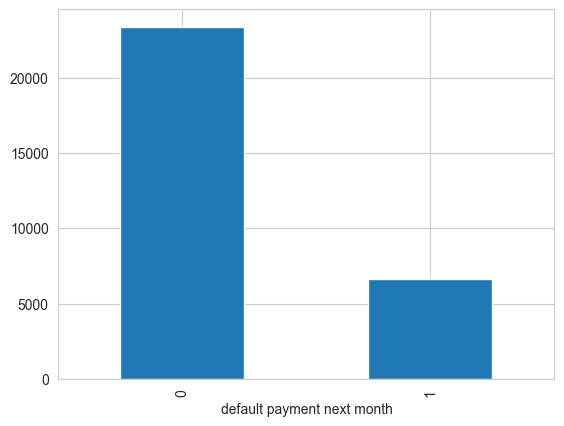

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [113]:
import pandas as pd
from pandas import value_counts
# execute all the cells in the phase 1 notebook and make the variables available here
%run ./phase1_data_load_exploration.ipynb
if False:
    original_data = pd.DataFrame()
# After the command finishes, all the variables from that notebook,
# like the 'original_data' DataFrame, will be available here.
original_data.head(3)



**2.1 Payment Trend Feature**

    Calculate: Most recent payment status MINUS oldest payment status
    Name: payment_trend
    Purpose: Did payment behavior get worse (positive) or better (negative)?
    Use columns: PAY_0 and PAY_6


In [114]:

# First, ensure the columns are numeric before performing arithmetic
original_data['PAY_0'] = pd.to_numeric(original_data['PAY_0'])
original_data['PAY_6'] = pd.to_numeric(original_data['PAY_6'])

# Now, create the new feature. This operation is already in-place.
original_data['payment_trend'] = original_data['PAY_0'] - original_data['PAY_6']
original_data[['PAY_0', 'PAY_6', 'payment_trend']].head()


,PAY_0,PAY_6,payment_trend
1,2,-2,4
2,-1,2,-3
3,0,0,0
4,0,0,0
5,-1,0,-1


**2.2 Bill Amount Volatility Feature**

    Calculate: Standard deviation across all 6 monthly bill amounts
    Name: bill_volatility
    Purpose: How unstable is their spending?
    Use columns: BILL_AMT1 through BILL_AMT6

In [121]:
# original_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]=original_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].astype(float)
original_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]=original_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].apply(pd.to_numeric,axis=1)
original_data['bill_volatility']=original_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].std(axis=1)
original_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,payment_trend,bill_volatility,payment_ratio,utilization,num_delays
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,4,1761.633219,0.000000,0.195650,2
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,-3,637.967841,0.000000,0.022350,2
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0,6064.518593,0.051915,0.324878,0
4,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,0,10565.793518,0.042561,0.939800,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,-1,10668.590074,0.232072,0.172340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,5003,3047,5000,1000,0,0,86697.439530,0.044986,0.858855,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8998,129,0,0,0,-1,3200.534247,1.090855,0.011220,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,22000,4200,2000,3100,1,4,9354.149660,0.000000,0.118833,3
29999,80000,1,3,1,41,1,-1,0,0,0,...,1178,1926,52964,1804,1,2,32992.487323,-52.250608,-0.020563,1


**2.3 Payment Ratio Feature**

    Calculate: Most recent payment amount divided by most recent bill amount
    Name: payment_ratio
    Purpose: Are they paying off their bills?
    Use columns: PAY_AMT1 and BILL_AMT1
    Handle division by zero (add 1 to denominator)

In [116]:
original_data['PAY_AMT1']=pd.to_numeric(original_data['PAY_AMT1'])
# original_data.info()
original_data['payment_ratio']=(original_data['PAY_AMT1']/(original_data['BILL_AMT1']+1))
original_data['payment_ratio'].fillna(0,inplace=True)
original_data
# original_data[['PAY_AMT1','BILL_AMT1','payment_ratio']]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,payment_trend,bill_volatility,payment_ratio
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,4,1761.633219,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,-3,637.967841,0.000000
3,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,6064.518593,0.051915
4,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,10565.793518,0.042561
5,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,-1,10668.590074,0.232072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,0,86697.439530,0.044986
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,1837,3526,8998,129,0,0,0,-1,3200.534247,1.090855
29998,30000,1,2,2,37,4,3,2,-1,0,...,0,0,22000,4200,2000,3100,1,4,9354.149660,0.000000
29999,80000,1,3,1,41,1,-1,0,0,0,...,85900,3409,1178,1926,52964,1804,1,2,32992.487323,-52.250608


**2.4 Credit Utilization Feature**

    Calculate: Most recent bill amount divided by credit limit
    Name: utilization
    Purpose: How much of credit limit are they using?
    Use columns: BILL_AMT1 and LIMIT_BAL

In [117]:
original_data['LIMIT_BAL']=pd.to_numeric(original_data['LIMIT_BAL'])
original_data['utilization']=original_data['BILL_AMT1']/original_data['LIMIT_BAL']
original_data['utilization'].fillna(0,inplace=True)
original_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,payment_trend,bill_volatility,payment_ratio,utilization
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,4,1761.633219,0.000000,0.195650
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,-3,637.967841,0.000000,0.022350
3,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,6064.518593,0.051915,0.324878
4,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,10565.793518,0.042561,0.939800
5,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,-1,10668.590074,0.232072,0.172340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,0,86697.439530,0.044986,0.858855
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3526,8998,129,0,0,0,-1,3200.534247,1.090855,0.011220
29998,30000,1,2,2,37,4,3,2,-1,0,...,0,22000,4200,2000,3100,1,4,9354.149660,0.000000,0.118833
29999,80000,1,3,1,41,1,-1,0,0,0,...,3409,1178,1926,52964,1804,1,2,32992.487323,-52.250608,-0.020563


**2.5 Number of Delays Feature**

    Calculate: Count how many months had payment delays (value > 0)
    Name: num_delays
    Purpose: Pattern of consistent delays
    Use columns: PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6


In [118]:
original_data[['PAY_2','PAY_3','PAY_4','PAY_5']]=original_data[['PAY_2','PAY_3','PAY_4','PAY_5']].apply(pd.to_numeric,axis=1)
original_data['num_delays']=(original_data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]>0).sum(axis=1)
original_data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','num_delays']]


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,num_delays
1,2,2,-1,-1,-2,-2,2
2,-1,2,0,0,0,2,2
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...
29996,0,0,0,0,0,0,0
29997,-1,-1,-1,-1,0,0,0
29998,4,3,2,-1,0,0,3
29999,1,-1,0,0,0,-1,1


**Verification:**

    Display first 10 rows of new features
    Check for any infinite values
    Check for any NaN values created
    Show min and max values of each new feature
**Deliverable:**

    Brief explanation of why each feature might predict default

In [130]:
original_data.columns
original_data[['payment_trend', 'bill_volatility',
       'payment_ratio', 'utilization', 'num_delays']].head(10)
original_data[['payment_trend', 'bill_volatility',
       'payment_ratio', 'utilization', 'num_delays']].isna().sum()
original_data[['payment_trend', 'bill_volatility',
       'payment_ratio', 'utilization', 'num_delays']].describe()

/Users/garimajaiswal/Learning/AI-ML/ai-ml-learning-journey/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,payment_trend,bill_volatility,payment_ratio,utilization,num_delays
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,0.274400,12077.787549,inf,0.423771,0.834200
std,1.165683,20302.149149,NaN,0.411462,1.554303
min,-7.000000,0.000000,-1.088325e+04,-0.619892,0.000000
25%,0.000000,1549.935213,3.435171e-02,0.022032,0.000000
50%,0.000000,4579.662158,5.557199e-02,0.313994,0.000000
75%,1.000000,14352.259579,2.635207e-01,0.829843,1.000000
max,7.000000,647788.051081,inf,6.455300,6.000000
